In [21]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'filtered_data.csv')  # User uploaded fioytle to this path

df = pd.read_csv(file_path)
df

,note_id,person_id,age,gender_source_value,BMI,admission_department,division,ward,asa_class,surgeon_id,...,condition_source_value,surgery_room,previous_surgery,emergency_status,op_timing,day_of_the_week,week_of_the_month,month,surgeon_estimated_op_time,surgery_duration
0,101058,29,81,F,25.247087,General Surgery,Admission,NUGW2,2,9885,...,D00002196,203,N,N,TF2,Thursday,4,October,130,66
1,57801,64,60,F,24.376249,Otolaryngology,Admission,102,2,6194,...,D00003798,504,N,N,8A,Friday,2,January,300,130
2,71288,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF4,Monday,4,April,100,85
3,135104,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF2,Monday,3,August,100,83
4,221210,71,94,M,27.963140,Orthopedics,Admission,41,2,29473,...,D00018711,108,N,N,TF4,Monday,5,March,100,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161214,297111,4055249,1,M,23.700428,Pediatric Surgery,Admission,5A,1,100613,...,D00011688,5,N,Y,etc,Tuesday,2,September,200,123
161215,297455,4055328,1,M,20.612160,Pediatric Urology,Day,PDSC,1,6259,...,D00016707,7,N,N,8A,Monday,4,September,130,45
161216,297761,4055407,1,M,12.502703,Pediatric Surgery,Admission,5A,2,105057,...,D00011524,5,N,N,8A,Wednesday,3,September,130,43
161217,297753,4055558,4,F,14.365794,Pediatric Surgery,Admission,5A,2,105057,...,D00004831,5,N,N,TF6,Wednesday,3,September,130,82


In [22]:
from sklearn.model_selection import train_test_split

# Removing unnecessary columns
df.drop(columns=['note_id', 'person_id', 'surgeon_estimated_op_time', 'final_op_name'], inplace=True)

# Encoding binary columns
binary_cols = ['condition_source_value', 'op_code', 'surgeon_id', 'ward', 'admission_department', 'surgery_room']
for col in binary_cols:
    df[col] = df[col].astype('category').cat.codes

# One-hot encoding for other categorical columns
one_hot_cols = ['surgical_department', 'op_timing', 'month', 'anesthesia_type', 
                'day_of_the_week', 'asa_class', 'week_of_the_month', 
                'division', 'previous_surgery', 'emergency_status', 'gender_source_value']
df_encoded = pd.get_dummies(df, columns=one_hot_cols)

# Splitting the data
X_all = df_encoded.drop("surgery_duration", axis=1)
y_all = df_encoded["surgery_duration"]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Displaying the first few rows of the resulting dataframe
X_train_all
y_train_all


61344     122
137241     48
139478     76
113549     36
149411    127
         ... 
119879     76
103694     57
131932    311
146867     82
121958     57
Name: surgery_duration, Length: 128975, dtype: int64

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 128975, number of used features: 90
[LightGBM] [Info] Start training from score 136.030665


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_53636\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_53636\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_53636\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(models.keys(), rotation=45)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_53636\2521253221.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes

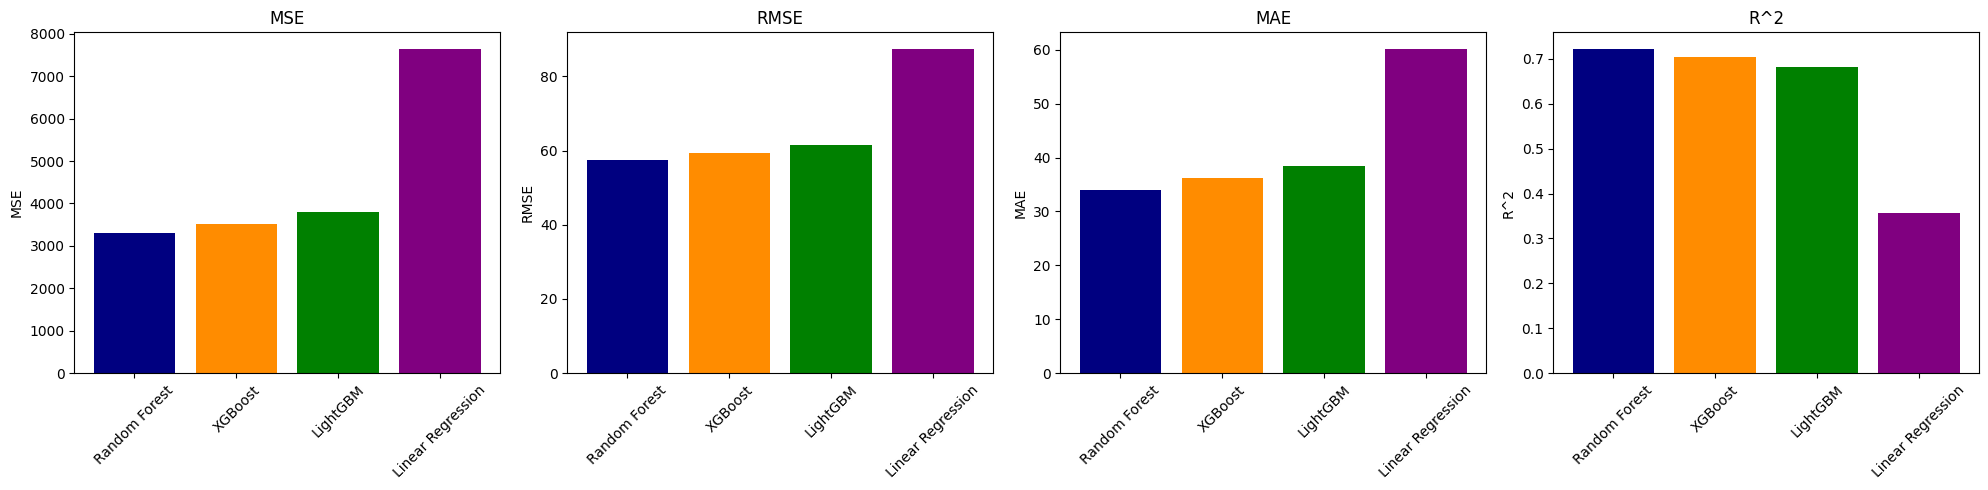

In [24]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Train each model and evaluate
model_results = {}
for name, model in models.items():
    # Training the model
    model.fit(X_train_all, y_train_all)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test_all)
    
    # Calculating evaluation metrics
    mae = mean_absolute_error(y_test_all, y_pred)
    mse = mean_squared_error(y_test_all, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_all, y_pred)
    
    # Storing the results
    model_results[name] = {"MSE": mse, "RMSE": rmse, "R^2": r2, "MAE": mae}

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(model_results).T
results_df

# Plotting the updated results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted for 4 subplots
metrics = ["MSE", "RMSE", "MAE", "R^2"]
colors = {"Random Forest": "navy", "XGBoost": "darkorange", "LightGBM": "green", "Linear Regression": "purple"}

for i, metric in enumerate(metrics):
    for model in models.keys():
        axes[i].bar(model, results_df.loc[model, metric], color=colors[model])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(models.keys(), rotation=45)

plt.tight_layout()
plt.show()


In [25]:
results_table = pd.DataFrame(model_results).T
results_table

,MSE,RMSE,R^2,MAE
Random Forest,3300.686943,57.451605,0.722866,34.046044
XGBoost,3517.460563,59.308183,0.704665,36.200433
LightGBM,3795.776755,61.609875,0.681297,38.366333
Linear Regression,7652.660793,87.479488,0.357462,60.208567
